In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv('df.csv') #Read in dataframe

ts = df[['Date', 'Battery Electric Vehicle (BEV) Count']] #Dataframe for time series

## Modelling - Time Series Analysis
This will be the model I use within my presentation

Either I can use the total count and look at how that increases over time, but rather I will use the month on month change of EV's within Washington

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [5]:
ts.head()

,Date,Battery Electric Vehicle (BEV) Count
0,2017-01-31,14738
1,2017-02-28,15206
2,2017-03-31,15596
3,2017-04-30,16104
4,2017-05-31,16569


In [6]:
#Exponential Moving Averages
#https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/

# Smoothing factor - 0.1
ts['EMA_0.1'] = ts['Battery Electric Vehicle (BEV) Count'].ewm(alpha=0.1, adjust=False).mean()
# Smoothing factor  - 0.3
ts['EMA_0.3'] = ts['Battery Electric Vehicle (BEV) Count'].ewm(alpha=0.3, adjust=False).mean()

/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_7213/2419791410.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['EMA_0.1'] = ts['Battery Electric Vehicle (BEV) Count'].ewm(alpha=0.1, adjust=False).mean()
/var/folders/v1/kyy1qs715rbg2rqbmr3z3rb40000gn/T/ipykernel_7213/2419791410.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['EMA_0.3'] = ts['Battery Electric Vehicle (BEV) Count'].ewm(alpha=0.3, adjust=False).mean()


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90')])

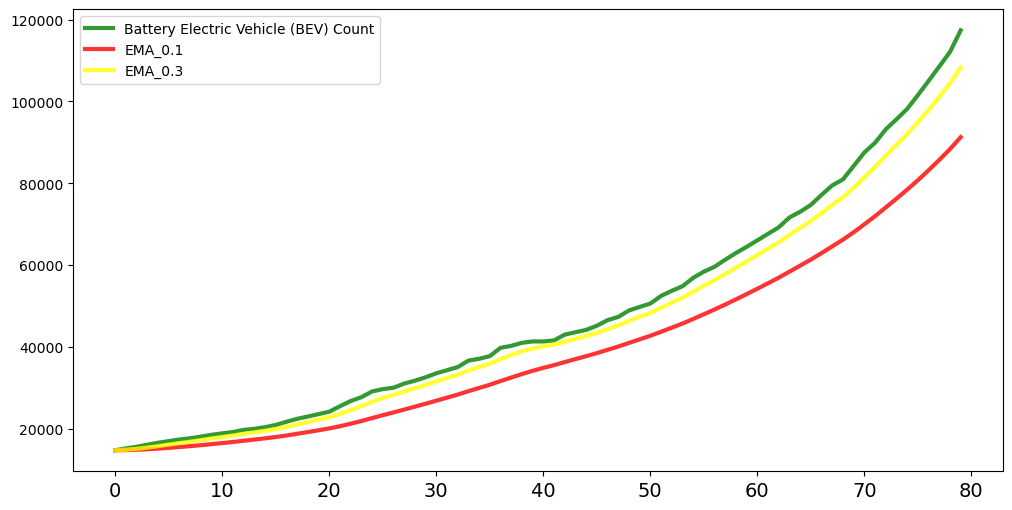

In [7]:
#Plotting above
colors = ['green', 'red', 'yellow']
ts[['Battery Electric Vehicle (BEV) Count', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)

In [8]:
#New dataframe for month on month BEV's added
ts2 = df[['Date', 'New BEV Added']]
ts2 = ts2.drop(0)
ts2.head()

,Date,New BEV Added
1,2017-02-28,468.0
2,2017-03-31,390.0
3,2017-04-30,508.0
4,2017-05-31,465.0
5,2017-06-30,417.0


In [9]:
# Smoothing factor - 0.1
ts2['EMA_0.1'] = ts2['New BEV Added'].ewm(alpha=0.1, adjust=False).mean()
# Smoothing factor  - 0.3
ts2['EMA_0.3'] = ts2['New BEV Added'].ewm(alpha=0.3, adjust=False).mean()

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90')])

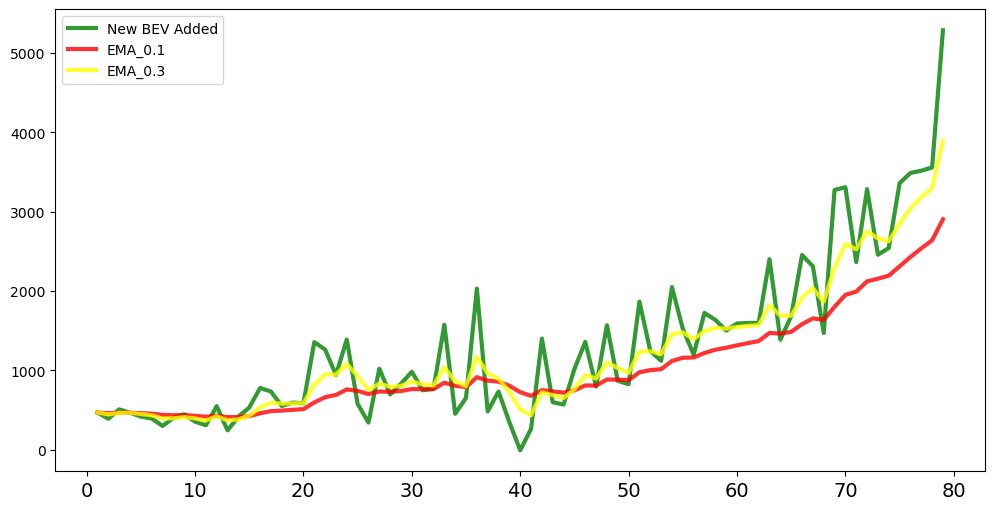

In [10]:
#Plot above
colors = ['green', 'red', 'yellow']
ts2[['New BEV Added', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)

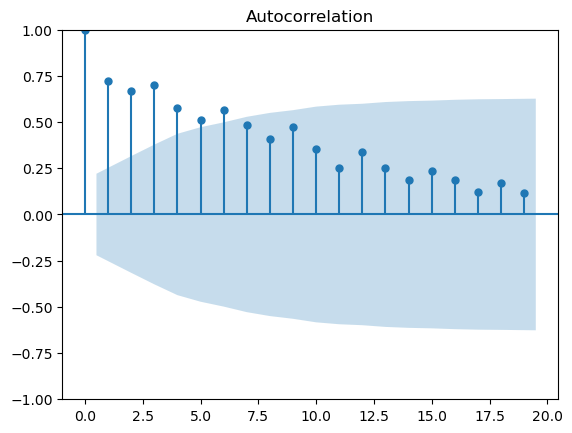

In [11]:
#ACF
plot_acf(ts2['New BEV Added'])
plt.show()

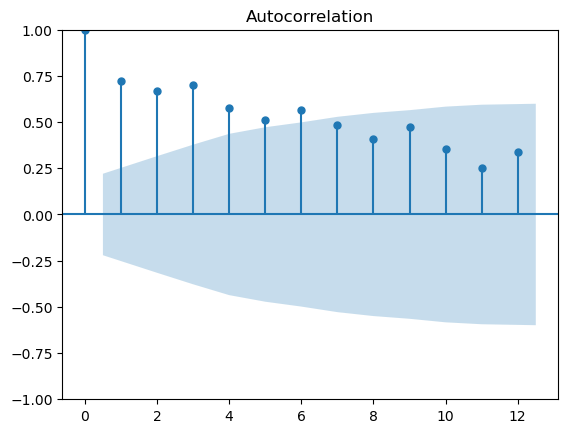

In [12]:
plot_acf(ts2['New BEV Added'], lags = 12)
plt.show()

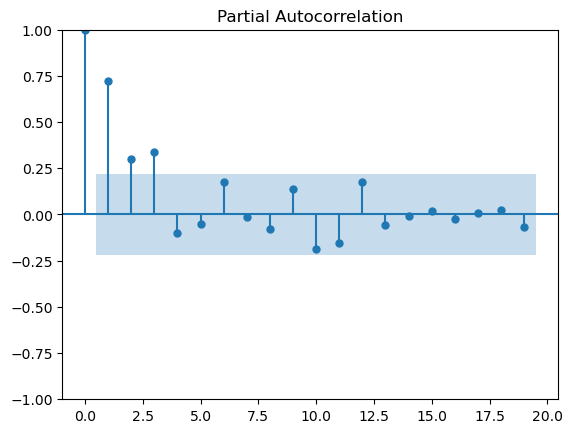

In [13]:
#PACF
plot_pacf(ts2['New BEV Added'])
plt.show()

### Multivariate Time Series Forecasting